Compare the mean body temperature on menstrual days (all days during flow) to non-menstrual days.


In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import json
from scipy.stats import ttest_ind

# Paths to your XML and JSON data files
menstrual_flow_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"  # Replace with your XML file path
temperature_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json"  # Replace with your JSON file path

# Load and parse the menstrual flow XML data
tree = ET.parse(menstrual_flow_path)
root = tree.getroot()

# Extract menstrual flow start dates
menstrual_flow_dates = []
for record in root.findall("Record"):
    if record.get("type") == "HKCategoryTypeIdentifierMenstrualFlow":
        for metadata in record.findall("MetadataEntry"):
            if metadata.get("key") == "HKMenstrualCycleStart" and metadata.get("value") == "1":
                start_date = record.get("startDate").split(" ")[0]  # Only the date part
                menstrual_flow_dates.append(start_date)

# Convert to DataFrame
menstrual_flow_df = pd.DataFrame({"start_date": pd.to_datetime(menstrual_flow_dates)})

# Load the temperature JSON data
with open(temperature_data_path, "r") as file:
    temperature_data = json.load(file)

# Convert JSON data to DataFrame
temperature_df = pd.DataFrame(temperature_data)
temperature_df["date"] = pd.to_datetime(temperature_df["date"])

# Identify menstrual and non-menstrual days
temperature_df["is_menstrual"] = temperature_df["date"].dt.date.isin(menstrual_flow_df["start_date"].dt.date)

# Group data into menstrual and non-menstrual
menstrual_temps = temperature_df[temperature_df["is_menstrual"]]["temperature"]
non_menstrual_temps = temperature_df[~temperature_df["is_menstrual"]]["temperature"]

# Perform t-test
t_stat, p_value = ttest_ind(menstrual_temps, non_menstrual_temps, equal_var=False)

# Display results
# Print the null hypothesis
print("Null Hypothesis: The body temperature does not rise during menstrual flow.")

# Perform t-test
t_stat, p_value = ttest_ind(menstrual_temps, non_menstrual_temps, equal_var=False)

# Display results
# Print the null and alternative hypotheses
print("Null Hypothesis: The body temperature does not rise during menstrual flow.")
print("Alternative Hypothesis: The body temperature significantly rises during menstrual flow.")

# Perform t-test
t_stat, p_value = ttest_ind(menstrual_temps, non_menstrual_temps, equal_var=False)

# Display results
print("Average Temperature During Menstrual Flow:", menstrual_temps.mean())
print("Average Temperature on Non-Menstrual Days:", non_menstrual_temps.mean())
print("T-Test Results: t-statistic =", t_stat, ", p-value =", p_value)

# Interpretation
if p_value < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in temperature.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in temperature.")

Null Hypothesis: The body temperature does not rise during menstrual flow.
Null Hypothesis: The body temperature does not rise during menstrual flow.
Alternative Hypothesis: The body temperature significantly rises during menstrual flow.
Average Temperature During Menstrual Flow: 37.07777777777778
Average Temperature on Non-Menstrual Days: 36.70441767068274
T-Test Results: t-statistic = 4.9112993402820795 , p-value = 0.0004699406514043625
Result: Reject the null hypothesis. There is a significant difference in temperature.


Test in order to find a correlation within the daytime and body temperature


In [2]:
import json
import pandas as pd

# Path to your JSON temperature data
temperature_data_path =  "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json" # Replace with your JSON file path

# Load the temperature JSON data
with open(temperature_data_path, "r") as file:
    temperature_data = json.load(file)

# Convert JSON data to DataFrame
temperature_df = pd.DataFrame(temperature_data)
temperature_df["date"] = pd.to_datetime(temperature_df["date"])

# Define time periods
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Noon"
    else:
        return "Night"

# Add a time-of-day column
temperature_df["time_of_day"] = temperature_df["date"].dt.hour.apply(categorize_time_of_day)

# Calculate the average temperature for each time period
avg_temperatures = temperature_df.groupby("time_of_day")["temperature"].mean()

# Identify the period with the highest temperature
highest_period = avg_temperatures.idxmax()
highest_temp = avg_temperatures.max()

# Print results
print("Average Temperature by Time of Day:")
print(avg_temperatures)
print(f"The time of day with the highest average temperature is '{highest_period}' with an average temperature of {highest_temp:.2f}°C.")

# Print your hypothesis
print("Hypothesis: Body temperature rises until the end of the day (highest at night).")

# Compare the results with your hypothesis
if highest_period == "Night":
    print("Result: The hypothesis is supported. The highest temperature occurs at night.")
else:
    print(f"Result: The hypothesis is not supported. The highest temperature occurs during '{highest_period}'.")

Average Temperature by Time of Day:
time_of_day
Morning    36.722093
Night      36.711628
Noon       36.718605
Name: temperature, dtype: float64
The time of day with the highest average temperature is 'Morning' with an average temperature of 36.72°C.
Hypothesis: Body temperature rises until the end of the day (highest at night).
Result: The hypothesis is not supported. The highest temperature occurs during 'Morning'.


In [3]:
from scipy.stats import f_oneway

# Group temperatures by time period
morning_temps = temperature_df[temperature_df["time_of_day"] == "Morning"]["temperature"]
noon_temps = temperature_df[temperature_df["time_of_day"] == "Noon"]["temperature"]
night_temps = temperature_df[temperature_df["time_of_day"] == "Night"]["temperature"]

# Perform ANOVA test
f_stat, p_value_anova = f_oneway(morning_temps, noon_temps, night_temps)

# Print results
print("ANOVA Test Results:")
print("F-statistic:", f_stat)
print("p-value:", p_value_anova)

# Interpretation
if p_value_anova < 0.05:
    print("Result: There is a significant difference in temperatures across time periods.")
else:
    print("Result: No significant difference in temperatures across time periods.")

ANOVA Test Results:
F-statistic: 0.011641683967956163
p-value: 0.9884263435366618
Result: No significant difference in temperatures across time periods.


In [4]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
h_stat, p_value_kruskal = kruskal(morning_temps, noon_temps, night_temps)

# Print results
print("Kruskal-Wallis Test Results:")
print("H-statistic:", h_stat)
print("p-value:", p_value_kruskal)

# Interpretation
if p_value_kruskal < 0.05:
    print("Result: There is a significant difference in temperatures across time periods.")
else:
    print("Result: No significant difference in temperatures across time periods.")

Kruskal-Wallis Test Results:
H-statistic: 0.03510007545679484
p-value: 0.982603067209545
Result: No significant difference in temperatures across time periods.


In [5]:
from scipy.stats import pearsonr, spearmanr

# Map time periods to numeric values
time_mapping = {"Morning": 0, "Noon": 1, "Night": 2}
temperature_df["time_numeric"] = temperature_df["time_of_day"].map(time_mapping)

# Perform Pearson correlation
pearson_corr, p_value_pearson = pearsonr(temperature_df["time_numeric"], temperature_df["temperature"])

# Perform Spearman correlation (non-parametric)
spearman_corr, p_value_spearman = spearmanr(temperature_df["time_numeric"], temperature_df["temperature"])

# Print results
print("Correlation Analysis Results:")
print("Pearson Correlation Coefficient:", pearson_corr, ", p-value:", p_value_pearson)
print("Spearman Correlation Coefficient:", spearman_corr, ", p-value:", p_value_spearman)

# Interpretation
if p_value_pearson < 0.05:
    print("Result: Pearson correlation suggests a significant relationship between time of day and temperature.")
else:
    print("Result: Pearson correlation does not suggest a significant relationship.")

if p_value_spearman < 0.05:
    print("Result: Spearman correlation suggests a significant relationship between time of day and temperature.")
else:
    print("Result: Spearman correlation does not suggest a significant relationship.")

Correlation Analysis Results:
Pearson Correlation Coefficient: -0.009382873269676191 , p-value: 0.8807782334350173
Spearman Correlation Coefficient: -0.010673252315220774 , p-value: 0.8645302692538684
Result: Pearson correlation does not suggest a significant relationship.
Result: Spearman correlation does not suggest a significant relationship.


<Figure size 1000x600 with 0 Axes>

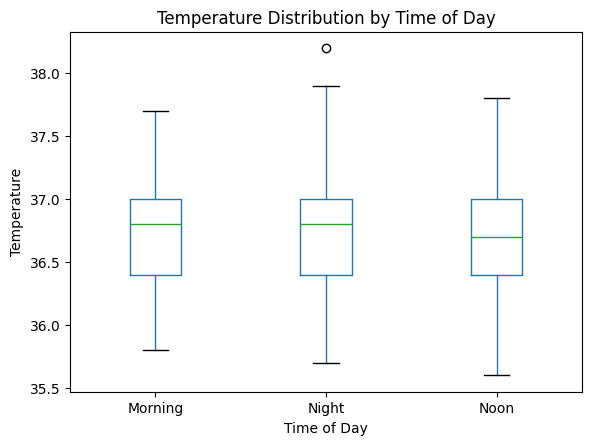

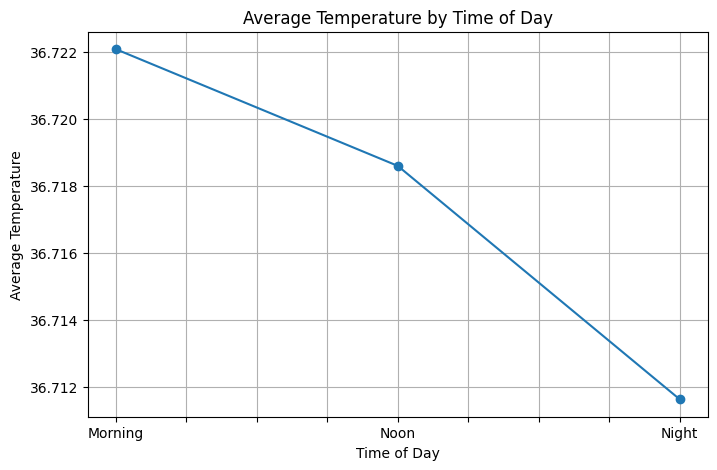

In [6]:
import matplotlib.pyplot as plt

# Boxplot for temperatures by time of day
plt.figure(figsize=(10, 6))
temperature_df.boxplot(column="temperature", by="time_of_day")
plt.title("Temperature Distribution by Time of Day")
plt.suptitle("")  # Remove default title
plt.xlabel("Time of Day")
plt.ylabel("Temperature")
plt.grid(False)
plt.show()

# Line plot for average temperature across time periods
avg_temp_by_time = temperature_df.groupby("time_of_day")["temperature"].mean()
avg_temp_by_time = avg_temp_by_time.loc[["Morning", "Noon", "Night"]]  # Order the periods

plt.figure(figsize=(8, 5))
avg_temp_by_time.plot(kind="line", marker="o")
plt.title("Average Temperature by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Temperature")
plt.grid(True)
plt.show()

In [13]:
import pandas as pd
import json

# Paths to your data files
temperature_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json"   # Replace with your JSON file path

# Menstrual cycle start dates and durations
menstrual_cycles = {
    "2024-09-27": 5,  # Start date and duration
    "2024-10-28": 4,
    "2024-11-23": 7
}

# Load the temperature JSON data
with open(temperature_data_path, "r") as file:
    temperature_data = json.load(file)

# Convert JSON data to DataFrame
temperature_df = pd.DataFrame(temperature_data)
temperature_df["date"] = pd.to_datetime(temperature_df["date"])  # Ensure datetime format

# Define the function to calculate cycle day (Day 1 starts on menstrual flow start date)
def get_cycle_day(date):
    date = pd.to_datetime(date).date()  # Ensure it's a date object
    for start_date, duration in menstrual_cycles.items():
        start_date = pd.to_datetime(start_date).date()  # Ensure start_date is also a date object
        if start_date <= date <= start_date + pd.Timedelta(days=duration - 1):
            return (date - start_date).days + 1  # Return the cycle day (1-based index)
    return None  # Return None if not part of a menstrual cycle

# Identify the menstrual cycle day for each temperature reading
temperature_df["cycle_day"] = temperature_df["date"].apply(get_cycle_day)

# Filter only the days within menstrual cycles
menstrual_temp_df = temperature_df.dropna(subset=["cycle_day"])

# Calculate average temperature for all cycle days
overall_avg_temp = menstrual_temp_df["temperature"].mean()

# Find days where the temperature is above the overall average
above_avg_days = menstrual_temp_df[menstrual_temp_df["temperature"] > overall_avg_temp]

# Group by cycle day and calculate average temperature per day
average_temps_by_day = menstrual_temp_df.groupby("cycle_day")["temperature"].mean()

# Find the specific cycle days where the temperature rises above the overall average
cycle_days_above_avg = average_temps_by_day[average_temps_by_day > overall_avg_temp]

# Determine which days (by cycle day) consistently show higher-than-average temperatures across all cycles
consistent_high_days = []
for day in cycle_days_above_avg.index:
    high_in_all_cycles = all(
        menstrual_temp_df[
            (menstrual_temp_df["cycle_day"] == day)
        ]["temperature"].mean() > overall_avg_temp
        for _, duration in menstrual_cycles.items()
    )
    if high_in_all_cycles:
        consistent_high_days.append(day)

# Print Results
print(f"Overall Average Temperature during Menstrual Cycles: {overall_avg_temp:.2f}°C")
print("\nDays where body temperature is above the overall average:")
print(above_avg_days)

print("\nCycle days where the average temperature is higher than the overall average:")
print(cycle_days_above_avg)

print("\nDays across all cycles where body temperature consistently rises above the overall average:")
print(consistent_high_days)


Overall Average Temperature during Menstrual Cycles: 36.91°C

Days where body temperature is above the overall average:
                   date  temperature  cycle_day
3   2024-09-27 10:55:00         37.2        1.0
4   2024-09-27 15:09:00         37.4        1.0
5   2024-09-27 21:52:00         37.2        1.0
15  2024-10-01 08:08:00         37.0        5.0
17  2024-10-01 21:05:00         37.1        5.0
96  2024-10-28 08:52:00         37.3        1.0
99  2024-10-29 09:48:00         37.4        2.0
101 2024-10-29 23:23:00         37.0        2.0
176 2024-11-23 22:21:00         37.1        1.0
177 2024-11-24 09:52:00         37.0        2.0
178 2024-11-24 15:19:00         37.5        2.0
179 2024-11-24 23:31:00         37.6        2.0
180 2024-11-25 11:02:00         37.5        3.0
181 2024-11-25 16:20:00         37.0        3.0
183 2024-11-26 10:38:00         37.0        4.0
184 2024-11-26 14:42:00         37.4        4.0
185 2024-11-26 20:09:00         37.0        4.0
186 2024-11-27 1

Perform hypothesis testing for only the first two days of the menstural cycle 



In [15]:
import pandas as pd
import json
from scipy.stats import ttest_ind

# Paths to your data files
temperature_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json"  # Replace
# Paths to your data files
temperature_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json"  

# Menstrual cycle start dates and durations
menstrual_cycles = {
    "2024-09-27": 5,  # Start date and duration
    "2024-10-28": 4,
    "2024-11-23": 7
}

# Load the temperature JSON data
with open(temperature_data_path, "r") as file:
    temperature_data = json.load(file)

# Convert JSON data to DataFrame
temperature_df = pd.DataFrame(temperature_data)
temperature_df["date"] = pd.to_datetime(temperature_df["date"])

# Define the function to calculate cycle day
def get_cycle_day(date):
    date = pd.to_datetime(date).date()  # Ensure it's a date object
    for start_date, duration in menstrual_cycles.items():
        start_date = pd.to_datetime(start_date).date()  # Ensure start_date is also a date object
        if start_date <= date <= start_date + pd.Timedelta(days=duration - 1):
            return (date - start_date).days + 1  # Return the cycle day (1-based index)
    return None  # Return None if not part of a menstrual cycle

# Assign cycle days to the temperature data
temperature_df["cycle_day"] = temperature_df["date"].apply(get_cycle_day)

# Filter data for Day 1 and Day 2 of the menstrual cycle
days_1_and_2_temps = temperature_df[temperature_df["cycle_day"].isin([1, 2])]["temperature"]

# Filter non-menstrual days
non_menstrual_temps = temperature_df[temperature_df["cycle_day"].isna()]["temperature"]

# Perform t-test between Day 1 & 2 temperatures and non-menstrual days
t_stat, p_value = ttest_ind(days_1_and_2_temps, non_menstrual_temps, equal_var=False)

# Display results
print(" Alternative Hypothesis: Body temperature rises during the first days of the menstrual cycle.")
print("\nDay 1 and Day 2 Average Temperature:", days_1_and_2_temps.mean())
print("Non-Menstrual Days Average Temperature:", non_menstrual_temps.mean())
print("T-Test Results: t-statistic =", t_stat, ", p-value =", p_value)

# Interpretation
if p_value < 0.05:
    print("Result: Reject the null hypothesis. Body temperature significantly rises during Day 1 and Day 2.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in body temperature.")


 Alternative Hypothesis: Body temperature rises during the first days of the menstrual cycle.

Day 1 and Day 2 Average Temperature: 37.083333333333336
Non-Menstrual Days Average Temperature: 36.672380952380955
T-Test Results: t-statistic = 5.745598789946167 , p-value = 4.298963007136907e-06
Result: Reject the null hypothesis. Body temperature significantly rises during Day 1 and Day 2.


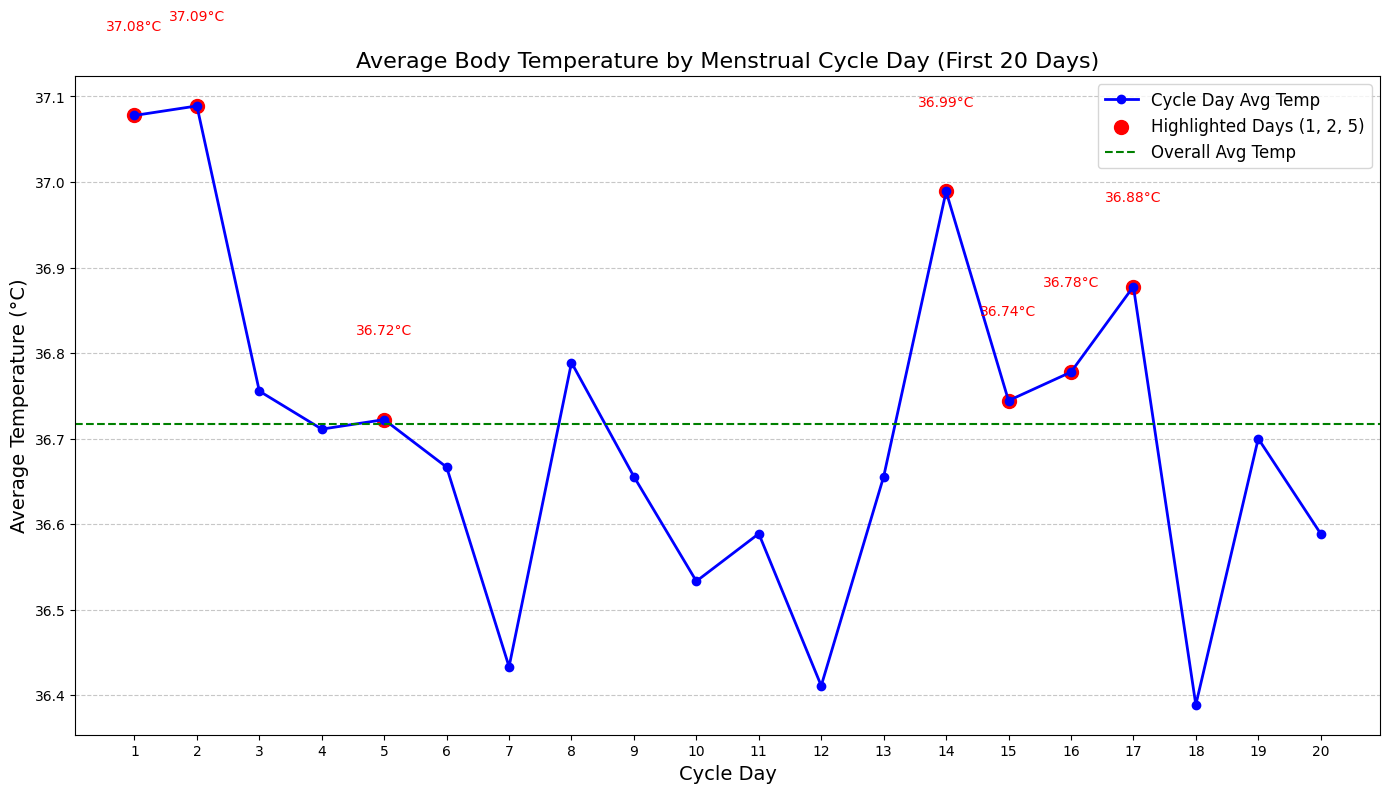

In [20]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Load the temperature JSON data
temperature_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json"  # Replace with your JSON file path

with open(temperature_data_path, "r") as file:
    temperature_data = json.load(file)

# Convert JSON data to DataFrame
temperature_df = pd.DataFrame(temperature_data)
temperature_df["date"] = pd.to_datetime(temperature_df["date"])

# Menstrual cycle start dates and durations
menstrual_cycles = {
    "2024-09-27": 25,  # Start date and cycle duration (adjust as needed)
    "2024-10-28": 25,
    "2024-11-23": 25,
}

# Define a function to calculate cycle day
def get_cycle_day(date):
    date = pd.to_datetime(date).date()
    for start_date, duration in menstrual_cycles.items():
        start_date = pd.to_datetime(start_date).date()
        if start_date <= date <= start_date + pd.Timedelta(days=duration - 1):
            return (date - start_date).days + 1  # Return cycle day (1-based index)
    return None

# Assign cycle days to the temperature data
temperature_df["cycle_day"] = temperature_df["date"].apply(get_cycle_day)

# Filter data for the first 20 cycle days
first_20_days_df = temperature_df[temperature_df["cycle_day"] <= 20]

# Calculate average temperature for each cycle day
average_temps_first_20_days = (
    first_20_days_df.groupby("cycle_day")["temperature"].mean().dropna()
)

# Highlight specific days (e.g., Days 1, 2, and 5)
highlight_days = [1, 2, 5,14,15,16,17]

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(
    average_temps_first_20_days.index,
    average_temps_first_20_days.values,
    marker="o",
    label="Cycle Day Avg Temp",
    linewidth=2,
    color="blue",
)
plt.scatter(
    highlight_days,
    [average_temps_first_20_days.loc[day] for day in highlight_days],
    color="red",
    s=100,
    label="Highlighted Days (1, 2, 5)",
)

# Add annotations for highlighted days
for day in highlight_days:
    plt.text(
        day,
        average_temps_first_20_days.loc[day] + 0.1,
        f"{average_temps_first_20_days.loc[day]:.2f}°C",
        color="red",
        ha="center",
        fontsize=10,
    )

# Add a horizontal line for the overall average temperature
overall_avg_temp = temperature_df["temperature"].mean()
plt.axhline(
    y=overall_avg_temp,
    color="green",
    linestyle="--",
    linewidth=1.5,
    label="Overall Avg Temp",
)

# Customize plot
plt.title("Average Body Temperature by Menstrual Cycle Day (First 20 Days)", fontsize=16)
plt.xlabel("Cycle Day", fontsize=14)
plt.ylabel("Average Temperature (°C)", fontsize=14)
plt.xticks(range(1, 21))  # Show days 1 to 20
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


TEST FOR OTHER DAYS OF THE CYCLE 


In [ ]:
from scipy.stats import ttest_1samp
import pandas as pd
import json

# Load the temperature JSON data
temperature_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json"  # Replace with your JSON file path

with open(temperature_data_path, "r") as file:
    temperature_data = json.load(file)

# Convert JSON data to DataFrame
temperature_df = pd.DataFrame(temperature_data)
temperature_df["date"] = pd.to_datetime(temperature_df["date"])

# Menstrual cycle start dates and durations
menstrual_cycles = {
    "2024-09-27": 25,
    "2024-10-28": 25,
    "2024-11-23": 25,
}

# Define a function to calculate cycle day
def get_cycle_day(date):
    date = pd.to_datetime(date).date()
    for start_date, duration in menstrual_cycles.items():
        start_date = pd.to_datetime(start_date).date()
        if start_date <= date <= start_date + pd.Timedelta(days=duration - 1):
            return (date - start_date).days + 1  # Return cycle day (1-based index)
    return None

# Assign cycle days to the temperature data
temperature_df["cycle_day"] = temperature_df["date"].apply(get_cycle_day)

# Calculate overall average temperature
overall_avg_temp = temperature_df["temperature"].mean()

# Days to test
test_days = [14, 15, 16, 17]

# Perform hypothesis tests for each of the days
print("Hypothesis Testing for Cycle Days 14, 15, 16, and 17:")
for day in test_days:
    # Filter temperatures for the current day
    day_temps = temperature_df[temperature_df["cycle_day"] == day]["temperature"]

    if not day_temps.empty:
        # Perform a one-sample t-test against the overall average
        t_stat, p_value = ttest_1samp(day_temps, overall_avg_temp)

        # Display the results
        print(f"\nDay {day}:")
        print(f"  - Mean Temperature: {day_temps.mean():.2f}°C")
        print(f"  - Overall Avg Temperature: {overall_avg_temp:.2f}°C")
        print(f"  - t-statistic: {t_stat:.2f}")
        print(f"  - p-value: {p_value:.4f}")
        print(f"  - Significant Difference: {'Yes' if p_value < 0.05 else 'No'}")
    else:
        print(f"\nDay {day}: No data available for this day.")


Hypothesis Testing for Cycle Days 14, 15, 16, and 17:

Day 14:
  - Mean Temperature: 36.99°C
  - Overall Avg Temperature: 36.72°C
  - t-statistic: 2.53
  - p-value: 0.0353
  - Significant Difference: Yes

Day 15:
  - Mean Temperature: 36.74°C
  - Overall Avg Temperature: 36.72°C
  - t-statistic: 0.22
  - p-value: 0.8280
  - Significant Difference: No

Day 16:
  - Mean Temperature: 36.78°C
  - Overall Avg Temperature: 36.72°C
  - t-statistic: 0.55
  - p-value: 0.5992
  - Significant Difference: No

Day 17:
  - Mean Temperature: 36.88°C
  - Overall Avg Temperature: 36.72°C
  - t-statistic: 1.97
  - p-value: 0.0840
  - Significant Difference: No


To the findings day 5,15,16,17 is not significant enough to spot the correlation.But there is a correlation between the day 14.

MOOD:


Successfully loaded data from: /Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv

Average Mood Scores for Each Cycle Day Across All Cycles (First 25 Days):
cycle_day
1     3.333333
2     4.000000
3     3.000000
4     3.000000
5     3.000000
6     2.666667
7     2.666667
8     2.666667
9     4.000000
10    4.000000
11    3.666667
12    3.666667
13    3.666667
14    2.333333
15    3.333333
16    2.333333
17    2.333333
18    2.333333
19    3.000000
20    3.333333
21    4.000000
22    2.750000
23    4.000000
24    4.333333
25    3.666667
Name: mood_score, dtype: float64


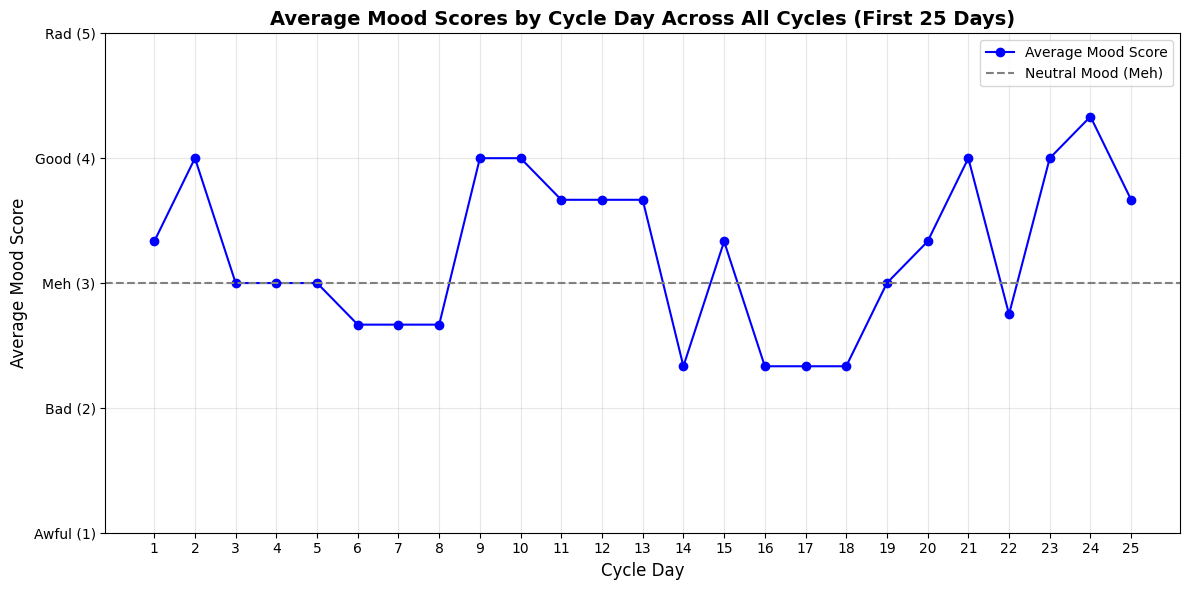

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

# Define menstrual cycle start dates
menstrual_cycles = {
    "2024-09-27": None,  # Start date of the first cycle
    "2024-10-28": None,  # Start date of the second cycle
    "2024-11-23": None,  # Start date of the third cycle; lasts until the end of data
}

# Standardize menstrual cycle dates
menstrual_cycles = {pd.to_datetime(date).date(): duration for date, duration in menstrual_cycles.items()}

# Function to calculate normalized cycle day
def get_normalized_cycle_day(date, menstrual_cycles, last_date):
    date = pd.to_datetime(date).date()
    sorted_cycles = sorted(menstrual_cycles.keys())  # Ensure the cycles are sorted by date
    for i, start_date in enumerate(sorted_cycles):
        next_start_date = sorted_cycles[i + 1] if i + 1 < len(sorted_cycles) else None
        end_date = next_start_date - timedelta(days=1) if next_start_date else last_date
        if start_date <= date <= end_date:
            normalized_day = (date - start_date).days + 1
            if normalized_day <= 25:  # Only include the first 25 days
                return normalized_day
    return None

# Main function to process mood data and calculate averages
def analyze_mood_data_and_cycles(mood_data_path):
    try:
        # Check if the file exists
        if not os.path.exists(mood_data_path):
            print(f"Error: The file at '{mood_data_path}' does not exist.")
            return

        # Load the mood data
        df = pd.read_csv(mood_data_path)
        print(f"Successfully loaded data from: {mood_data_path}")

        # Map mood descriptions to numeric scores
        mood_map = {"awful": 1, "bad": 2, "meh": 3, "good": 4, "rad": 5}
        df["mood_score"] = df["mood"].map(mood_map)

        # Ensure dates are in datetime format
        df["full_date"] = pd.to_datetime(df["full_date"], errors="coerce")
        df = df.dropna(subset=["full_date"])  # Drop rows with invalid dates

        # Determine the last date in the data
        last_date = df["full_date"].max().date()

        # Add normalized cycle day column (only up to 25 days)
        df["cycle_day"] = df["full_date"].apply(lambda x: get_normalized_cycle_day(x, menstrual_cycles, last_date))

        # Filter out rows with no cycle_day
        df = df.dropna(subset=["cycle_day"])
        df["cycle_day"] = df["cycle_day"].astype(int)  # Ensure cycle_day is an integer

        # Calculate average mood score for each cycle day across all cycles
        avg_mood_per_cycle_day = df.groupby("cycle_day")["mood_score"].mean()

        # Print average mood scores
        print("\nAverage Mood Scores for Each Cycle Day Across All Cycles (First 25 Days):")
        print(avg_mood_per_cycle_day)

        # Visualization
        plt.figure(figsize=(12, 6))
        plt.plot(avg_mood_per_cycle_day.index, avg_mood_per_cycle_day.values, marker="o", linestyle="-", label="Average Mood Score", color="b")
        plt.axhline(y=3, color="gray", linestyle="--", label="Neutral Mood (Meh)")
        plt.xticks(range(1, 26), fontsize=10)
        plt.yticks(range(1, 6), ["Awful (1)", "Bad (2)", "Meh (3)", "Good (4)", "Rad (5)"])
        plt.xlabel("Cycle Day", fontsize=12)
        plt.ylabel("Average Mood Score", fontsize=12)
        plt.title("Average Mood Scores by Cycle Day Across All Cycles (First 25 Days)", fontsize=14, fontweight="bold")
        plt.legend(fontsize=10)
        plt.grid(alpha=0.3)
        plt.tight_layout()

        # Show the plot
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the path to your mood data
mood_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv"  # Replace with your actual file path

# Run the analysis
analyze_mood_data_and_cycles(mood_data_path)


In [28]:
import pandas as pd
from scipy.stats import ttest_1samp
import os

# Define menstrual cycle start dates and durations
menstrual_cycles = {
    "2024-09-27": 5,  # Start date and duration
    "2024-10-28": 4,
    "2024-11-23": None,  # Last cycle; include all data until the end of mood records
}

# Function to calculate cycle day
def get_cycle_day(date, last_date):
    date = pd.to_datetime(date).date()
    for start_date, duration in menstrual_cycles.items():
        start_date = pd.to_datetime(start_date).date()
        if duration is not None:
            end_date = start_date + pd.Timedelta(days=duration - 1)
        else:
            end_date = last_date  # Extend last cycle to the end of data
        if start_date <= date <= end_date:
            return (date - start_date).days + 1  # 1-based cycle day
    return None

# Main function to analyze mood for all cycle days
def analyze_all_cycle_days(mood_data_path):
    try:
        # Check if the file exists
        if not os.path.exists(mood_data_path):
            print(f"Error: The file at '{mood_data_path}' does not exist.")
            return

        # Load the mood data
        df = pd.read_csv(mood_data_path)
        print(f"Successfully loaded data from: {mood_data_path}")

        # Map mood descriptions to numeric scores
        mood_map = {"awful": 1, "bad": 2, "meh": 3, "good": 4, "rad": 5}
        df["mood_score"] = df["mood"].map(mood_map)

        # Ensure dates are in datetime format
        df["full_date"] = pd.to_datetime(df["full_date"], errors="coerce")
        df = df.dropna(subset=["full_date"])  # Drop rows with invalid dates

        # Determine the last date in the data
        last_date = df["full_date"].max().date()

        # Add cycle day column
        df["cycle_day"] = df["full_date"].apply(lambda x: get_cycle_day(x, last_date))

        # Overall mood average
        overall_avg_mood = df["mood_score"].mean()

        # Analyze all cycle days
        print("\nAnalyzing Mood for All Cycle Days:")
        for day in range(1, int(df["cycle_day"].max()) + 1):  # Iterate through all possible cycle days
            day_moods = df[df["cycle_day"] == day]["mood_score"]
            if day_moods.empty or len(day_moods) < 2:
                print(f"Cycle Day {day}: Not enough data for analysis (at least 2 data points required).")
                continue

            # Perform one-sample t-test against the overall mood average
            t_stat, p_value = ttest_1samp(day_moods, overall_avg_mood)

            # Print results
            print(f"\nCycle Day {day}:")
            print(f"  - Mean Mood Score: {day_moods.mean():.2f}")
            print(f"  - Overall Avg Mood Score: {overall_avg_mood:.2f}")
            print(f"  - t-statistic: {t_stat:.2f}")
            print(f"  - p-value: {p_value:.4f}")
            if p_value < 0.05:
                print(f"  - Significant Mood Difference on Cycle Day {day} (p < 0.05)")
            else:
                print(f"  - No Significant Mood Difference on Cycle Day {day} (p >= 0.05)")

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the path to your mood data
mood_data_path ="/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv"  # Replace with your actual file path

# Run the analysis
analyze_all_cycle_days(mood_data_path)


Successfully loaded data from: /Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv

Analyzing Mood for All Cycle Days:

Cycle Day 1:
  - Mean Mood Score: 3.33
  - Overall Avg Mood Score: 3.25
  - t-statistic: 0.25
  - p-value: 0.8259
  - No Significant Mood Difference on Cycle Day 1 (p >= 0.05)

Cycle Day 2:
  - Mean Mood Score: 4.00
  - Overall Avg Mood Score: 3.25
  - t-statistic: 0.75
  - p-value: 0.5315
  - No Significant Mood Difference on Cycle Day 2 (p >= 0.05)

Cycle Day 3:
  - Mean Mood Score: 3.00
  - Overall Avg Mood Score: 3.25
  - t-statistic: -0.25
  - p-value: 0.8259
  - No Significant Mood Difference on Cycle Day 3 (p >= 0.05)

Cycle Day 4:
  - Mean Mood Score: 3.00
  - Overall Avg Mood Score: 3.25
  - t-statistic: -0.25
  - p-value: 0.8259
  - No Significant Mood Difference on Cycle Day 4 (p >= 0.05)

Cycle Day 5:
  - Mean Mood Score: 3.00
  - Overall Avg Mood Score: 3.25
  - t-statistic: -0.12
  - p-value: 0.9208
  - No Significant Mood Difference on C

Successfully loaded data from: /Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv


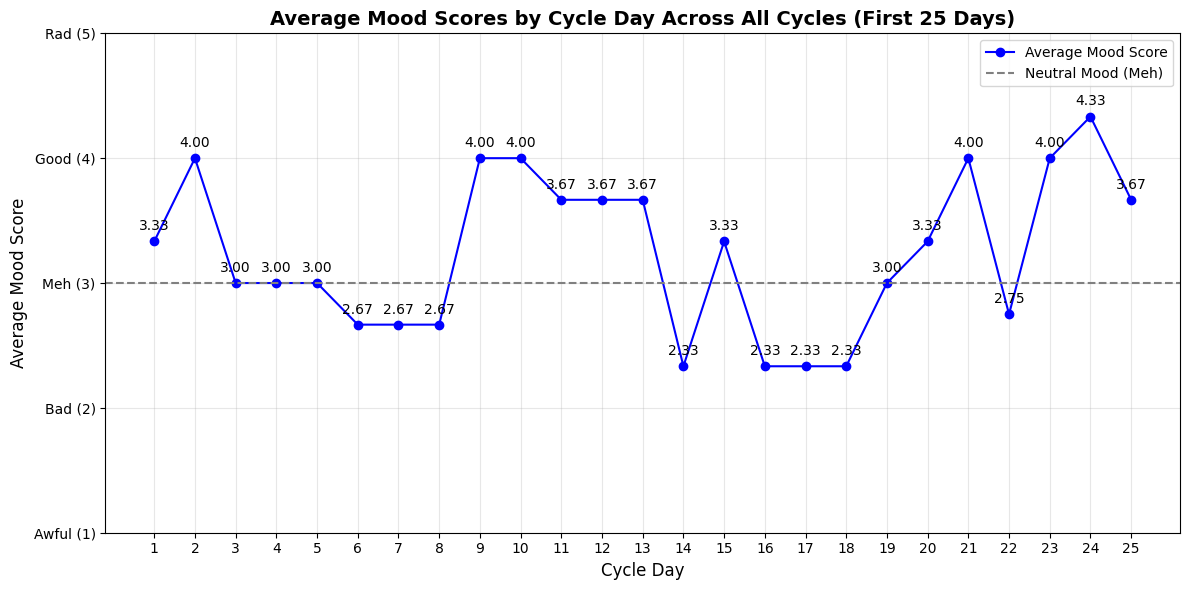

In [40]:
import matplotlib.pyplot as plt

# Function to visualize average mood scores for the first 25 days
def visualize_average_mood(avg_mood_per_cycle_day):
    # Create the figure and axis
    plt.figure(figsize=(12, 6))

    # Plot the average mood scores
    plt.plot(
        avg_mood_per_cycle_day.index,
        avg_mood_per_cycle_day.values,
        marker="o",
        linestyle="-",
        label="Average Mood Score",
        color="b",
    )

    # Add a horizontal line for "Neutral Mood" (Meh, score of 3)
    plt.axhline(y=3, color="gray", linestyle="--", label="Neutral Mood (Meh)")

    # Highlight specific days with annotations
    for day, mood in avg_mood_per_cycle_day.items():
        plt.annotate(
            f"{mood:.2f}",
            (day, mood),
            textcoords="offset points",
            xytext=(0, 8),
            ha="center",
            fontsize=10,
            color="black",
        )

    # Customize the x-axis and y-axis
    plt.xticks(range(1, 26), fontsize=10)
    plt.yticks(range(1, 6), ["Awful (1)", "Bad (2)", "Meh (3)", "Good (4)", "Rad (5)"])

    # Add labels and title
    plt.xlabel("Cycle Day", fontsize=12)
    plt.ylabel("Average Mood Score", fontsize=12)
    plt.title("Average Mood Scores by Cycle Day Across All Cycles (First 25 Days)", fontsize=14, fontweight="bold")

    # Add a legend
    plt.legend(fontsize=10)

    # Add a grid for better readability
    plt.grid(alpha=0.3)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()


# Example usage
# Assuming `avg_mood_per_cycle_day` is the output from the previous code:
# visualize_average_mood(avg_mood_per_cycle_day)


Successfully loaded data from: /Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv
Pre-Menstrual Average Mood Score: 3.29
Menstrual Average Mood Score: 3.25


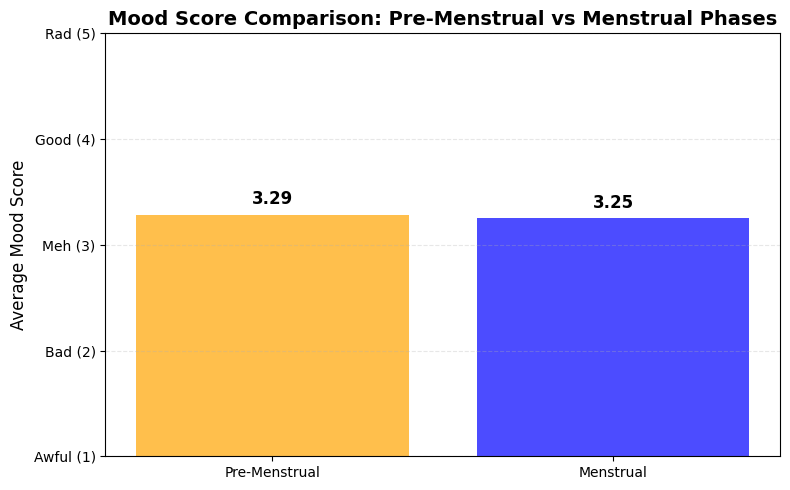

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import os

# Define menstrual cycle start dates
menstrual_cycles = {
    "2024-09-27": 5,  # Start date and duration of the cycle in days
    "2024-10-28": 4,
    "2024-11-23": 7,
}

# Standardize menstrual cycle dates
menstrual_cycles = {pd.to_datetime(date).date(): duration for date, duration in menstrual_cycles.items()}

# Function to calculate pre-menstrual and menstrual phase
def get_cycle_phase(date, menstrual_cycles):
    date = pd.to_datetime(date).date()
    for start_date, duration in menstrual_cycles.items():
        start_date = pd.to_datetime(start_date).date()
        pre_start_date = start_date - timedelta(days=3)  # 3 days before the cycle starts
        end_date = start_date + timedelta(days=duration - 1)
        if pre_start_date <= date < start_date:
            return "pre-menstrual"
        elif start_date <= date <= end_date:
            return "menstrual"
    return None

# Main function to process mood data, calculate averages, and visualize
def analyze_and_visualize_pre_menstrual_and_menstrual(mood_data_path):
    try:
        # Check if the file exists
        if not os.path.exists(mood_data_path):
            print(f"Error: The file at '{mood_data_path}' does not exist.")
            return

        # Load the mood data
        df = pd.read_csv(mood_data_path)
        print(f"Successfully loaded data from: {mood_data_path}")

        # Map mood descriptions to numeric scores
        mood_map = {"awful": 1, "bad": 2, "meh": 3, "good": 4, "rad": 5}
        df["mood_score"] = df["mood"].map(mood_map)

        # Ensure dates are in datetime format
        df["full_date"] = pd.to_datetime(df["full_date"], errors="coerce")
        df = df.dropna(subset=["full_date"])  # Drop rows with invalid dates

        # Add cycle phase column
        df["cycle_phase"] = df["full_date"].apply(lambda x: get_cycle_phase(x, menstrual_cycles))

        # Filter pre-menstrual and menstrual data
        pre_menstrual_data = df[df["cycle_phase"] == "pre-menstrual"]
        menstrual_data = df[df["cycle_phase"] == "menstrual"]

        # Calculate averages
        pre_menstrual_avg = pre_menstrual_data["mood_score"].mean()
        menstrual_avg = menstrual_data["mood_score"].mean()

        # Print averages
        print(f"Pre-Menstrual Average Mood Score: {pre_menstrual_avg:.2f}")
        print(f"Menstrual Average Mood Score: {menstrual_avg:.2f}")

        # Visualization
        phases = ["Pre-Menstrual", "Menstrual"]
        averages = [pre_menstrual_avg, menstrual_avg]

        plt.figure(figsize=(8, 5))
        plt.bar(phases, averages, color=["orange", "blue"], alpha=0.7)
        plt.ylabel("Average Mood Score", fontsize=12)
        plt.ylim(1, 5)
        plt.title("Mood Score Comparison: Pre-Menstrual vs Menstrual Phases", fontsize=14, fontweight="bold")
        plt.xticks(fontsize=10)
        plt.yticks(range(1, 6), ["Awful (1)", "Bad (2)", "Meh (3)", "Good (4)", "Rad (5)"], fontsize=10)

        # Add annotations for clarity
        for i, avg in enumerate(averages):
            plt.text(i, avg + 0.1, f"{avg:.2f}", ha="center", fontsize=12, fontweight="bold")

        # Show the plot
        plt.tight_layout()
        plt.grid(alpha=0.3, linestyle="--", axis="y")
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the path to your mood data
mood_data_path ="/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv" # Replace with your actual file path

# Run the analysis and visualization
analyze_and_visualize_pre_menstrual_and_menstrual(mood_data_path)


Successfully loaded data from: /Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv
Classified Data Sample:
    full_date   mood  mood_score         period
0  2024-12-17   good           4  Non-Menstrual
1  2024-12-16    meh           3  Non-Menstrual
2  2024-12-15   good           4  Non-Menstrual
3  2024-12-14  awful           1  Non-Menstrual
4  2024-12-14    bad           2  Non-Menstrual
5  2024-12-13    meh           3  Non-Menstrual
6  2024-12-12  awful           1  Non-Menstrual
7  2024-12-11    bad           2  Non-Menstrual
8  2024-12-10    meh           3  Non-Menstrual
9  2024-12-09  awful           1  Non-Menstrual
10 2024-12-08  awful           1  Non-Menstrual
11 2024-12-07   good           4  Non-Menstrual
12 2024-12-06    bad           2  Non-Menstrual
13 2024-12-05    meh           3  Non-Menstrual
14 2024-12-04    meh           3  Non-Menstrual
15 2024-12-03  awful           1  Non-Menstrual
16 2024-12-02    bad           2  Non-Menstrual
17 2024-12-01

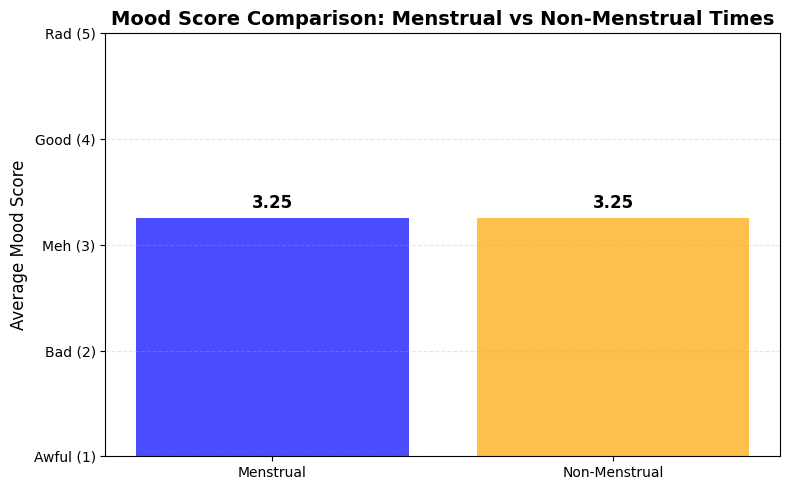

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import os

# Define menstrual cycle start dates and durations
menstrual_cycles = {
    "2024-09-27": 5,  # Start date and duration of the cycle in days
    "2024-10-28": 4,
    "2024-11-23": 7,
}

# Standardize menstrual cycle dates
menstrual_cycles = {pd.to_datetime(date).date(): duration for date, duration in menstrual_cycles.items()}

# Function to classify dates as Menstrual or Non-Menstrual
def classify_dates(date, menstrual_cycles):
    date = pd.to_datetime(date).date()
    for start_date, duration in menstrual_cycles.items():
        start_date = pd.to_datetime(start_date).date()
        end_date = start_date + timedelta(days=duration - 1)
        if start_date <= date <= end_date:
            return "Menstrual"
    return "Non-Menstrual"

# Main function to analyze and visualize menstrual vs non-menstrual times
def analyze_and_debug_menstrual_vs_non_menstrual(mood_data_path):
    try:
        # Check if the file exists
        if not os.path.exists(mood_data_path):
            print(f"Error: The file at '{mood_data_path}' does not exist.")
            return

        # Load the mood data
        df = pd.read_csv(mood_data_path)
        print(f"Successfully loaded data from: {mood_data_path}")

        # Map mood descriptions to numeric scores
        mood_map = {"awful": 1, "bad": 2, "meh": 3, "good": 4, "rad": 5}
        df["mood_score"] = df["mood"].map(mood_map)

        # Ensure dates are in datetime format
        df["full_date"] = pd.to_datetime(df["full_date"], errors="coerce")
        df = df.dropna(subset=["full_date"])  # Drop rows with invalid dates

        # Classify dates as Menstrual or Non-Menstrual
        df["period"] = df["full_date"].apply(lambda x: classify_dates(x, menstrual_cycles))

        # Debugging: Print classified data
        print("Classified Data Sample:")
        print(df[["full_date", "mood", "mood_score", "period"]].head(20))

        # Split into menstrual and non-menstrual data
        menstrual_data = df[df["period"] == "Menstrual"]
        non_menstrual_data = df[df["period"] == "Non-Menstrual"]

        # Debugging: Print grouped data
        print("\nMenstrual Data Sample:")
        print(menstrual_data)
        print("\nNon-Menstrual Data Sample:")
        print(non_menstrual_data)

        # Calculate averages
        menstrual_avg = menstrual_data["mood_score"].mean()
        non_menstrual_avg = non_menstrual_data["mood_score"].mean()

        # Debugging: Display counts and averages
        print(f"\nMenstrual data points: {len(menstrual_data)}")
        print(f"Non-menstrual data points: {len(non_menstrual_data)}")
        print(f"Menstrual Average Mood Score: {menstrual_avg:.2f}")
        print(f"Non-Menstrual Average Mood Score: {non_menstrual_avg:.2f}")

        # Visualization
        phases = ["Menstrual", "Non-Menstrual"]
        averages = [menstrual_avg, non_menstrual_avg]

        plt.figure(figsize=(8, 5))
        plt.bar(phases, averages, color=["blue", "orange"], alpha=0.7)
        plt.ylabel("Average Mood Score", fontsize=12)
        plt.ylim(1, 5)
        plt.title("Mood Score Comparison: Menstrual vs Non-Menstrual Times", fontsize=14, fontweight="bold")
        plt.xticks(fontsize=10)
        plt.yticks(range(1, 6), ["Awful (1)", "Bad (2)", "Meh (3)", "Good (4)", "Rad (5)"], fontsize=10)

        # Add annotations for clarity
        for i, avg in enumerate(averages):
            plt.text(i, avg + 0.1, f"{avg:.2f}", ha="center", fontsize=12, fontweight="bold")

        # Show the plot
        plt.tight_layout()
        plt.grid(alpha=0.3, linestyle="--", axis="y")
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the path to your mood data
mood_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv"  # Replace with your actual file path

# Run the analysis and debugging
analyze_and_debug_menstrual_vs_non_menstrual(mood_data_path)


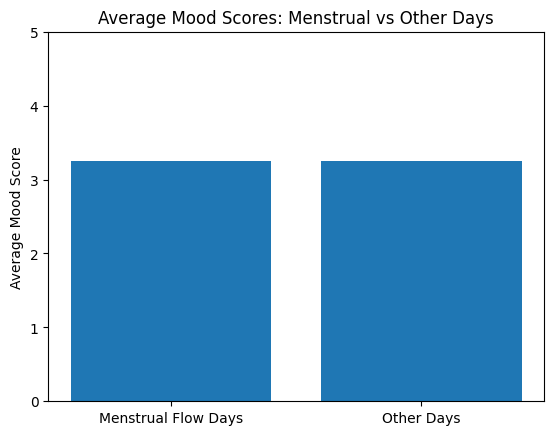

Average Mood Score on Menstrual Flow Days: 3.25
Average Mood Score on Other Days: 3.25


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Mood mapping
mood_mapping = {"awful": 1, "bad": 2, "meh": 3, "good": 4, "rad": 5}

# Menstrual flow dates
menstrual_flow_dates = [
    "2024-09-27", "2024-09-28", "2024-09-29", "2024-09-30", "2024-10-01",
    "2024-10-28", "2024-10-29", "2024-10-30", "2024-10-31",
    "2024-11-23", "2024-11-24", "2024-11-25", "2024-11-26", "2024-11-27", "2024-11-28", "2024-11-29"
]

# Load mood data
mood_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv" # Replace with the actual path
mood_df = pd.read_csv(mood_data_path)

# Convert 'full_date' to datetime
mood_df["full_date"] = pd.to_datetime(mood_df["full_date"])

# Map mood strings to numeric scores
mood_df["mood_score"] = mood_df["mood"].map(mood_mapping)

# Identify whether the date is in the menstrual flow group
mood_df["is_menstrual_flow"] = mood_df["full_date"].dt.strftime("%Y-%m-%d").isin(menstrual_flow_dates)

# Calculate average mood scores for both groups
average_mood_menstrual = mood_df[mood_df["is_menstrual_flow"]]["mood_score"].mean()
average_mood_non_menstrual = mood_df[~mood_df["is_menstrual_flow"]]["mood_score"].mean()

# Prepare data for plotting
categories = ["Menstrual Flow Days", "Other Days"]
averages = [average_mood_menstrual, average_mood_non_menstrual]

# Plot the results
plt.bar(categories, averages)
plt.title("Average Mood Scores: Menstrual vs Other Days")
plt.ylabel("Average Mood Score")
plt.ylim(0, 5)  # Mood scores range from 1 to 5
plt.show()

# Print results
print(f"Average Mood Score on Menstrual Flow Days: {average_mood_menstrual:.2f}")
print(f"Average Mood Score on Other Days: {average_mood_non_menstrual:.2f}")

Successfully loaded data from: /Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv

Weekend data points: 25
Weekday data points: 59
Weekend Average Mood Score: 3.40
Weekday Average Mood Score: 3.19


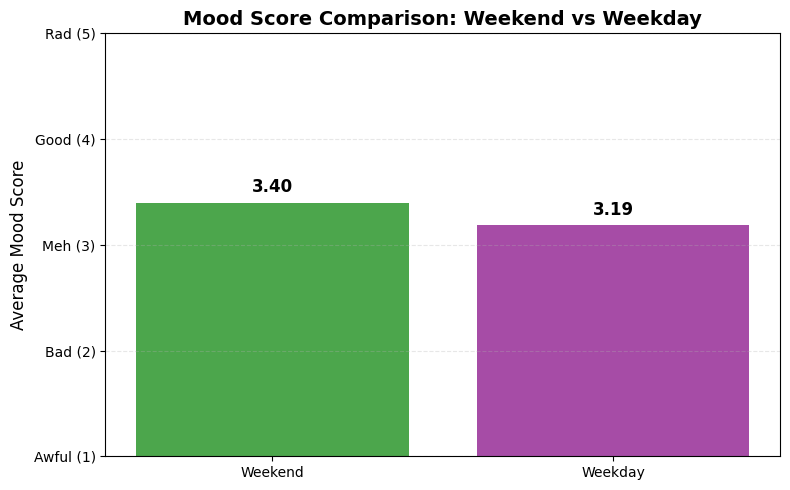

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Function to classify days as weekends or weekdays
def classify_weekday_or_weekend(date):
    weekday = pd.to_datetime(date).weekday()
    # Monday (0) to Friday (4) -> Weekday, Saturday (5) and Sunday (6) -> Weekend
    return "Weekend" if weekday >= 5 else "Weekday"

# Main function to analyze and visualize weekends vs weekdays
def analyze_and_visualize_weekend_vs_weekday(mood_data_path):
    try:
        # Check if the file exists
        if not os.path.exists(mood_data_path):
            print(f"Error: The file at '{mood_data_path}' does not exist.")
            return

        # Load the mood data
        df = pd.read_csv(mood_data_path)
        print(f"Successfully loaded data from: {mood_data_path}")

        # Map mood descriptions to numeric scores
        mood_map = {"awful": 1, "bad": 2, "meh": 3, "good": 4, "rad": 5}
        df["mood_score"] = df["mood"].map(mood_map)

        # Ensure dates are in datetime format
        df["full_date"] = pd.to_datetime(df["full_date"], errors="coerce")
        df = df.dropna(subset=["full_date"])  # Drop rows with invalid dates

        # Classify days as Weekends or Weekdays
        df["day_type"] = df["full_date"].apply(classify_weekday_or_weekend)

        # Group data by day type
        weekend_data = df[df["day_type"] == "Weekend"]
        weekday_data = df[df["day_type"] == "Weekday"]

        # Calculate averages
        weekend_avg = weekend_data["mood_score"].mean()
        weekday_avg = weekday_data["mood_score"].mean()

        # Debugging: Display counts and averages
        print(f"\nWeekend data points: {len(weekend_data)}")
        print(f"Weekday data points: {len(weekday_data)}")
        print(f"Weekend Average Mood Score: {weekend_avg:.2f}")
        print(f"Weekday Average Mood Score: {weekday_avg:.2f}")

        # Visualization
        phases = ["Weekend", "Weekday"]
        averages = [weekend_avg, weekday_avg]

        plt.figure(figsize=(8, 5))
        plt.bar(phases, averages, color=["green", "purple"], alpha=0.7)
        plt.ylabel("Average Mood Score", fontsize=12)
        plt.ylim(1, 5)
        plt.title("Mood Score Comparison: Weekend vs Weekday", fontsize=14, fontweight="bold")
        plt.xticks(fontsize=10)
        plt.yticks(range(1, 6), ["Awful (1)", "Bad (2)", "Meh (3)", "Good (4)", "Rad (5)"], fontsize=10)

        # Add annotations for clarity
        for i, avg in enumerate(averages):
            plt.text(i, avg + 0.1, f"{avg:.2f}", ha="center", fontsize=12, fontweight="bold")

        # Show the plot
        plt.tight_layout()
        plt.grid(alpha=0.3, linestyle="--", axis="y")
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the path to your mood data
mood_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv" # Replace with your actual file path

# Run the analysis and visualization
analyze_and_visualize_weekend_vs_weekday(mood_data_path)


Successfully loaded data from: /Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv

Mood Score Comparison: First 6 Weeks vs Last 6 Weeks
First 6 Weeks Average Mood Score: 3.86
Last 6 Weeks Average Mood Score: 2.72
T-statistic: 4.4316
P-value: 0.0020
Result: Reject the null hypothesis. Mood has significantly changed between the first 6 weeks and the last 6 weeks.


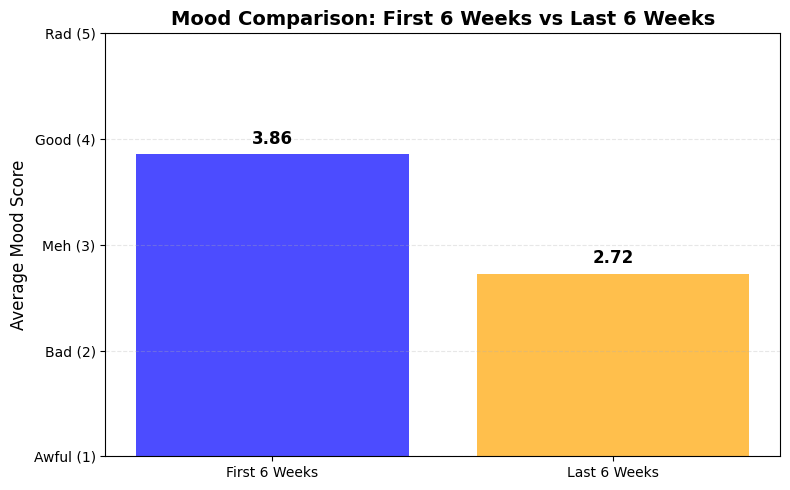

Successfully loaded data from: /Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv

Hypotheses:
Null Hypothesis (H0): There is no significant difference in mood between the first 6 weeks and the last 6 weeks.
Alternative Hypothesis (H1): There is a significant difference in mood between the first 6 weeks and the last 6 weeks.

Mood Score Comparison: First 6 Weeks vs Last 6 Weeks
First 6 Weeks Average Mood Score: 3.86
Last 6 Weeks Average Mood Score: 2.72
T-statistic: 4.4316
P-value: 0.0020

Result: Reject the null hypothesis. Mood has significantly changed between the first 6 weeks and the last 6 weeks.


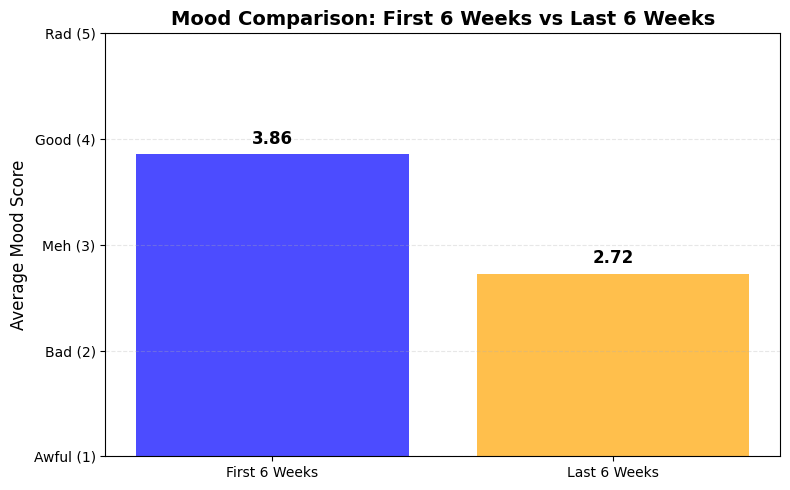

In [56]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import os

# Function to compare average mood between first 6 weeks and last 6 weeks
def analyze_mood_first_last_weeks(mood_data_path):
    try:
        # Check if the file exists
        if not os.path.exists(mood_data_path):
            print(f"Error: The file at '{mood_data_path}' does not exist.")
            return

        # Load the mood data
        df = pd.read_csv(mood_data_path)
        print(f"Successfully loaded data from: {mood_data_path}")

        # Map mood descriptions to numeric scores
        mood_map = {"awful": 1, "bad": 2, "meh": 3, "good": 4, "rad": 5}
        df["mood_score"] = df["mood"].map(mood_map)

        # Ensure dates are in datetime format and sort by date
        df["full_date"] = pd.to_datetime(df["full_date"], errors="coerce")
        df = df.dropna(subset=["full_date"]).sort_values(by="full_date")

        # Add a "week_number" column
        df["week_number"] = df["full_date"].dt.isocalendar().week

        # Group data by week and compute the mean mood score for each week
        weekly_mood = df.groupby("week_number")["mood_score"].mean().reset_index()

        # Extract data for the first 6 weeks and the last 6 weeks
        first_6_weeks = weekly_mood.iloc[:6]["mood_score"]
        last_6_weeks = weekly_mood.iloc[-6:]["mood_score"]

        # Perform two-sample t-test
        t_stat, p_value = ttest_ind(first_6_weeks, last_6_weeks, equal_var=False)

        # Print hypotheses
        print("\nHypotheses:")
        print("Null Hypothesis (H0): There is no significant difference in mood between the first 6 weeks and the last 6 weeks.")
        print("Alternative Hypothesis (H1): There is a significant difference in mood between the first 6 weeks and the last 6 weeks.\n")

        # Display the results
        print("Mood Score Comparison: First 6 Weeks vs Last 6 Weeks")
        print(f"First 6 Weeks Average Mood Score: {first_6_weeks.mean():.2f}")
        print(f"Last 6 Weeks Average Mood Score: {last_6_weeks.mean():.2f}")
        print(f"T-statistic: {t_stat:.4f}")
        print(f"P-value: {p_value:.4f}")

        # Interpret results
        if p_value < 0.05:
            print("\nResult: Reject the null hypothesis. Mood has significantly changed between the first 6 weeks and the last 6 weeks.")
        else:
            print("\nResult: Fail to reject the null hypothesis. No significant difference in mood between the first 6 weeks and the last 6 weeks.")

        # Visualization
        plt.figure(figsize=(8, 5))
        phases = ["First 6 Weeks", "Last 6 Weeks"]
        averages = [first_6_weeks.mean(), last_6_weeks.mean()]

        plt.bar(phases, averages, color=["blue", "orange"], alpha=0.7)
        plt.ylabel("Average Mood Score", fontsize=12)
        plt.ylim(1, 5)
        plt.title("Mood Comparison: First 6 Weeks vs Last 6 Weeks", fontsize=14, fontweight="bold")
        plt.xticks(fontsize=10)
        plt.yticks(range(1, 6), ["Awful (1)", "Bad (2)", "Meh (3)", "Good (4)", "Rad (5)"], fontsize=10)

        # Add annotations
        for i, avg in enumerate(averages):
            plt.text(i, avg + 0.1, f"{avg:.2f}", ha="center", fontsize=12, fontweight="bold")

        plt.tight_layout()
        plt.grid(alpha=0.3, linestyle="--", axis="y")
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the path to your mood data
mood_data_path ="/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailymooddata.csv"  # Replace with your actual file path

# Run the analysis
analyze_mood_first_last_weeks(mood_data_path)


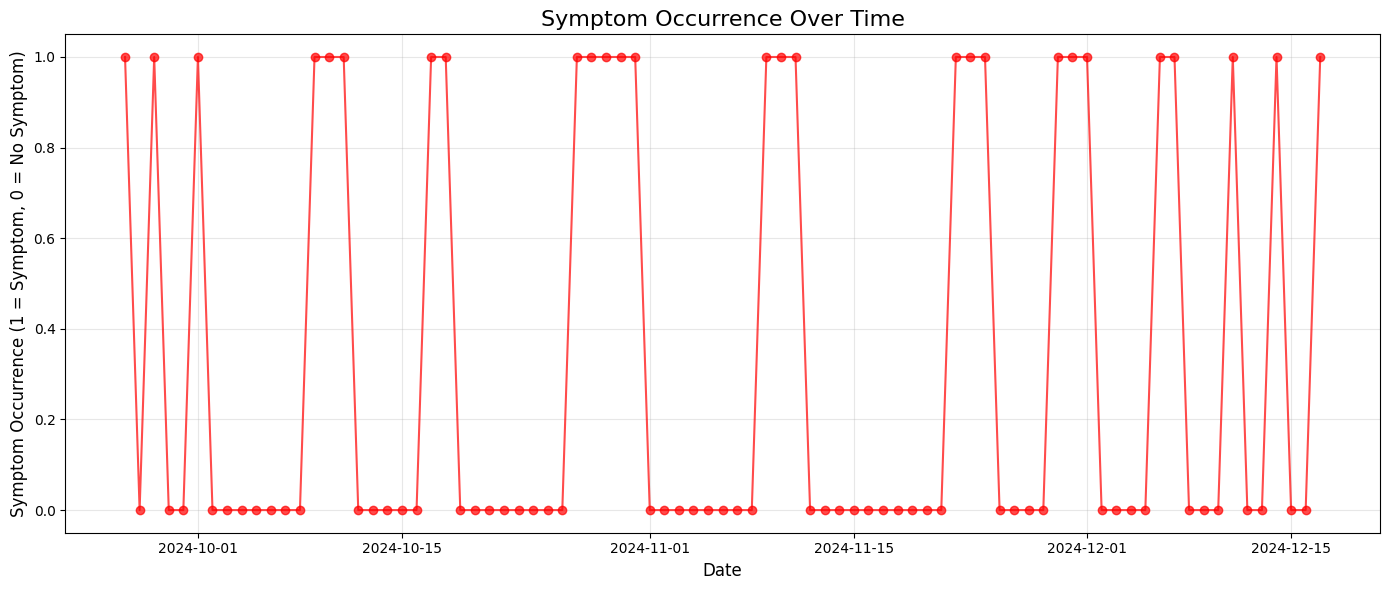

In [60]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

# Function to process the XML file and create the dataset
def process_symptoms(xml_file):
    # Parse the XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Symptom categories to include
    symptom_types = [
        "HKCategoryTypeIdentifierAbdominalCramps", "HKCategoryTypeIdentifierBloating",
        "HKCategoryTypeIdentifierHeadache", "HKCategoryTypeIdentifierAcne",
        "HKCategoryTypeIdentifierLowerBackPain", "HKCategoryTypeIdentifierPelvicPain",
        "HKCategoryTypeIdentifierMoodChanges", "HKCategoryTypeIdentifierDiarrhea",
        "HKCategoryTypeIdentifierFatigue", "HKCategoryTypeIdentifierNausea",
        "HKCategoryTypeIdentifierAppetiteChanges", "HKCategoryTypeIdentifierHotFlashes",
        "HKCategoryTypeIdentifierNightSweats", "HKCategoryTypeIdentifierChills",
        "HKCategoryTypeIdentifierHairLoss", "HKCategoryTypeIdentifierDrySkin",
        "HKCategoryTypeIdentifierBladderIncontinence", "HKCategoryTypeIdentifierMemoryLapse"
    ]

    # Initialize an empty list to store the records
    data = []

    # Iterate through each record in the XML
    for record in root.findall('Record'):
        record_type = record.get('type')
        start_date = record.get('startDate')

        # Include only the specified symptom types
        if record_type in symptom_types:
            data.append({'date': pd.to_datetime(start_date).date(), 'symptom': 1})

    # Convert the list to a DataFrame
    df = pd.DataFrame(data)

    # Generate a time range from the first to the last date
    all_dates = pd.date_range(start=min(df['date']), end=max(df['date'])).date

    # Create a DataFrame with all dates and initialize "symptom" column with 0
    full_data = pd.DataFrame({'date': all_dates})
    full_data['symptom'] = 0

    # Mark dates with symptoms as 1
    full_data.loc[full_data['date'].isin(df['date']), 'symptom'] = 1

    return full_data

# Function to visualize symptom occurrences
def visualize_symptoms(symptom_data):
    plt.figure(figsize=(14, 6))
    plt.plot(symptom_data['date'], symptom_data['symptom'], color='red', marker='o', linestyle='-', alpha=0.7)
    plt.title('Symptom Occurrence Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Symptom Occurrence (1 = Symptom, 0 = No Symptom)', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Path to your XML file
xml_file_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml" # Replace with your actual file path

# Process the XML and generate the dataset
symptom_data = process_symptoms(xml_file_path)

# Visualize the symptom data
visualize_symptoms(symptom_data)


XML file parsed successfully.


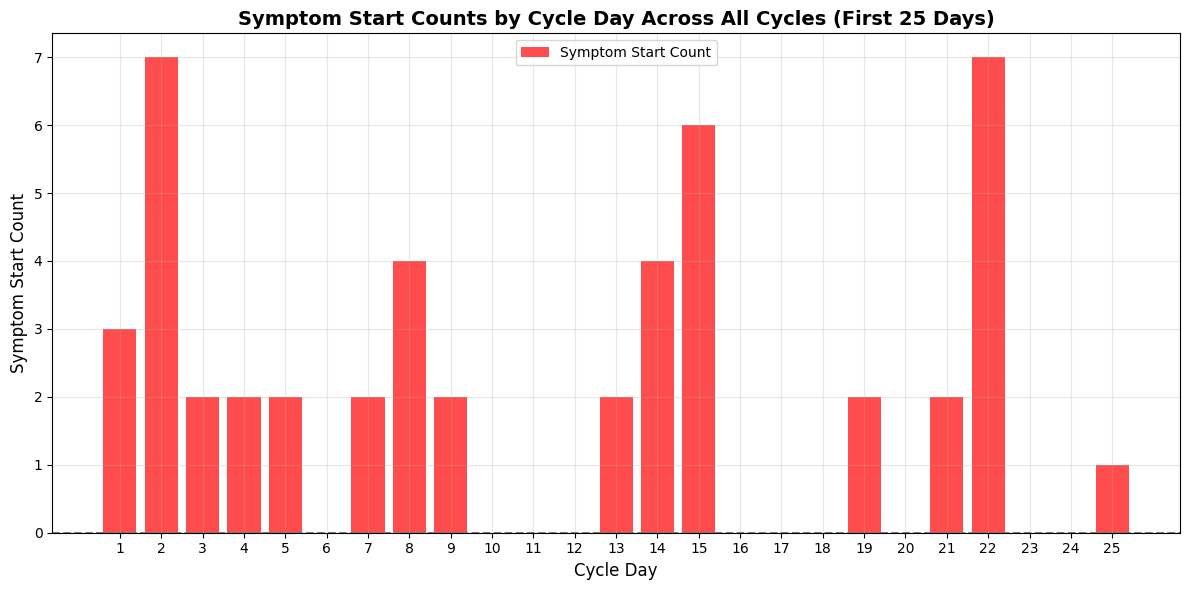

In [72]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from datetime import timedelta

# Define menstrual cycle start dates
menstrual_cycles = {
    "2024-09-27": None,
    "2024-10-28": None,
    "2024-11-23": None,
}

# Standardize menstrual cycle dates
menstrual_cycles = {pd.to_datetime(date).date(): duration for date, duration in menstrual_cycles.items()}

# Symptom types
symptom_types = {
    "HKCategoryTypeIdentifierAbdominalCramps",
    "HKCategoryTypeIdentifierBloating",
    "HKCategoryTypeIdentifierHeadache",
    "HKCategoryTypeIdentifierAcne",
    "HKCategoryTypeIdentifierLowerBackPain",
    "HKCategoryTypeIdentifierPelvicPain",
    "HKCategoryTypeIdentifierMoodChanges",
    "HKCategoryTypeIdentifierDiarrhea",
    "HKCategoryTypeIdentifierFatigue",
    "HKCategoryTypeIdentifierNausea",
    "HKCategoryTypeIdentifierAppetiteChanges",
    "HKCategoryTypeIdentifierHotFlashes",
    "HKCategoryTypeIdentifierNightSweats",
    "HKCategoryTypeIdentifierChills",
    "HKCategoryTypeIdentifierHairLoss",
    "HKCategoryTypeIdentifierDrySkin",
    "HKCategoryTypeIdentifierBladderIncontinence",
    "HKCategoryTypeIdentifierMemoryLapse",
}

# Function to calculate normalized cycle day
def get_normalized_cycle_day(date, menstrual_cycles, last_date):
    date = pd.to_datetime(date).date()
    sorted_cycles = sorted(menstrual_cycles.keys())
    for i, start_date in enumerate(sorted_cycles):
        next_start_date = sorted_cycles[i + 1] if i + 1 < len(sorted_cycles) else None
        end_date = next_start_date - timedelta(days=1) if next_start_date else last_date
        if start_date <= date <= end_date:
            normalized_day = (date - start_date).days + 1
            if normalized_day <= 25:
                return normalized_day
    return None

# Function to process XML data and extract symptom start days
def process_symptom_start_days(xml_file_path, menstrual_cycles):
    try:
        tree = ET.parse(xml_file_path)
        root = tree.getroot()
        print("XML file parsed successfully.")

        data = []

        # Iterate through the XML records
        for record in root.findall("Record"):
            record_type = record.get("type")
            if record_type in symptom_types:
                start_date = record.get("startDate").split(" ")[0]  # Extract start date
                normalized_day = get_normalized_cycle_day(start_date, menstrual_cycles, pd.Timestamp.now().date())
                if normalized_day:
                    data.append({"cycle_day": normalized_day, "symptom_type": record_type})

        return pd.DataFrame(data)

    except ET.ParseError as e:
        print(f"XML parsing error: {e}")
        return pd.DataFrame()
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return pd.DataFrame()

# Function to analyze and visualize symptom start days
def analyze_and_visualize_symptom_starts(symptom_data):
    try:
        # Count occurrences of symptoms per cycle day
        symptom_counts = symptom_data.groupby("cycle_day").size()

        # Visualization
        plt.figure(figsize=(12, 6))
        plt.bar(
            symptom_counts.index,
            symptom_counts.values,
            color="r",
            alpha=0.7,
            label="Symptom Start Count"
        )
        plt.axhline(y=0, color="gray", linestyle="--")

        # Add labels and titles
        plt.xlabel("Cycle Day", fontsize=12)
        plt.ylabel("Symptom Start Count", fontsize=12)
        plt.title("Symptom Start Counts by Cycle Day Across All Cycles (First 25 Days)", fontsize=14, fontweight="bold")
        plt.xticks(range(1, 26), fontsize=10)
        plt.legend(fontsize=10)
        plt.tight_layout()
        plt.grid(alpha=0.3)

        # Show the plot
        plt.show()

    except Exception as e:
        print(f"An error occurred while visualizing symptom data: {e}")

# Path to your XML file
xml_file_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"

# Check file existence
if not os.path.exists(xml_file_path):
    print(f"Error: File does not exist at path: {xml_file_path}")
else:
    # Process symptom data
    symptom_data = process_symptom_start_days(xml_file_path, menstrual_cycles)

    # Analyze and visualize symptom start days
    if not symptom_data.empty:
        analyze_and_visualize_symptom_starts(symptom_data)
    else:
        print("No symptom data available for visualization.")


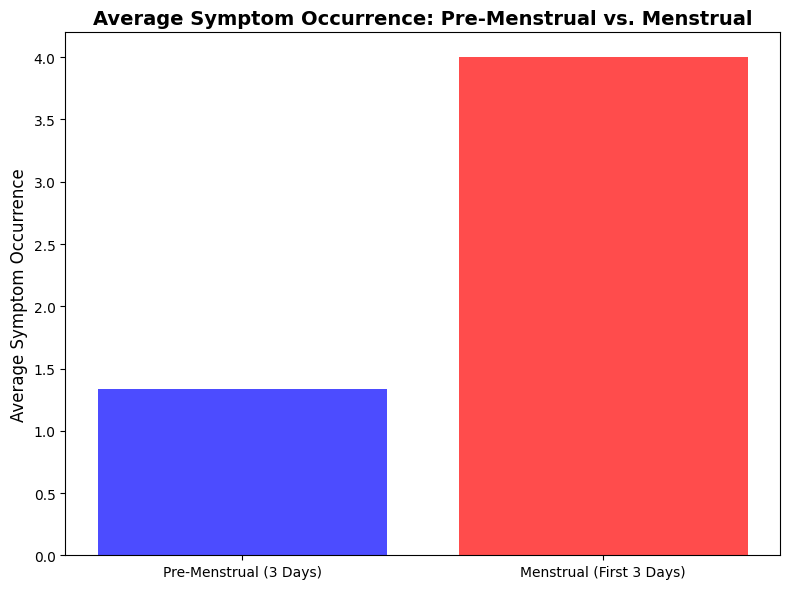

In [74]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from datetime import timedelta

# Define menstrual cycle start dates
menstrual_cycles = {
    "2024-09-27": None,
    "2024-10-28": None,
    "2024-11-23": None,
}

# Standardize menstrual cycle dates
menstrual_cycles = {pd.to_datetime(date).date(): duration for date, duration in menstrual_cycles.items()}

# Symptom types
symptom_types = {
    "HKCategoryTypeIdentifierAbdominalCramps",
    "HKCategoryTypeIdentifierBloating",
    "HKCategoryTypeIdentifierHeadache",
    "HKCategoryTypeIdentifierAcne",
    "HKCategoryTypeIdentifierLowerBackPain",
    "HKCategoryTypeIdentifierPelvicPain",
    "HKCategoryTypeIdentifierMoodChanges",
    "HKCategoryTypeIdentifierDiarrhea",
    "HKCategoryTypeIdentifierFatigue",
    "HKCategoryTypeIdentifierNausea",
    "HKCategoryTypeIdentifierAppetiteChanges",
    "HKCategoryTypeIdentifierHotFlashes",
    "HKCategoryTypeIdentifierNightSweats",
    "HKCategoryTypeIdentifierChills",
    "HKCategoryTypeIdentifierHairLoss",
    "HKCategoryTypeIdentifierDrySkin",
    "HKCategoryTypeIdentifierBladderIncontinence",
    "HKCategoryTypeIdentifierMemoryLapse",
}

# Function to process XML data and extract symptom occurrences
def process_symptom_data(xml_file_path):
    try:
        tree = ET.parse(xml_file_path)
        root = tree.getroot()
        
        data = []
        
        for record in root.findall("Record"):
            record_type = record.get("type")
            if record_type in symptom_types:
                start_date = record.get("startDate").split(" ")[0]  # Extract start date
                data.append({"date": pd.to_datetime(start_date).date(), "symptom_type": record_type})

        return pd.DataFrame(data)
    
    except ET.ParseError as e:
        print(f"XML parsing error: {e}")
        return pd.DataFrame()
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return pd.DataFrame()

# Function to calculate pre-menstrual and menstrual averages
def calculate_averages(symptom_data, menstrual_cycles):
    pre_menstrual_counts = []
    menstrual_day_counts = []

    for cycle_start in menstrual_cycles.keys():
        cycle_start_date = pd.to_datetime(cycle_start).date()
        pre_menstrual_range = [cycle_start_date - timedelta(days=i) for i in range(1, 4)]  # 3 days before
        menstrual_range = [cycle_start_date + timedelta(days=i) for i in range(3)]  # First 3 days

        pre_menstrual_counts.append(
            symptom_data[symptom_data["date"].isin(pre_menstrual_range)].shape[0]
        )
        menstrual_day_counts.append(
            symptom_data[symptom_data["date"].isin(menstrual_range)].shape[0]
        )

    # Calculate averages
    avg_pre_menstrual = sum(pre_menstrual_counts) / len(pre_menstrual_counts)
    avg_menstrual = sum(menstrual_day_counts) / len(menstrual_day_counts)

    return avg_pre_menstrual, avg_menstrual

# Function to visualize the averages
def visualize_averages(avg_pre_menstrual, avg_menstrual):
    categories = ["Pre-Menstrual (3 Days)", "Menstrual (First 3 Days)"]
    averages = [avg_pre_menstrual, avg_menstrual]

    plt.figure(figsize=(8, 6))
    plt.bar(categories, averages, color=["blue", "red"], alpha=0.7)
    plt.title("Average Symptom Occurrence: Pre-Menstrual vs. Menstrual", fontsize=14, fontweight="bold")
    plt.ylabel("Average Symptom Occurrence", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

# Path to your XML file
xml_file_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"  # Replace with your actual file path

# Check file existence
if not os.path.exists(xml_file_path):
    print(f"Error: File does not exist at path: {xml_file_path}")
else:
    # Process symptom data
    symptom_data = process_symptom_data(xml_file_path)

    if not symptom_data.empty:
        # Calculate averages
        avg_pre_menstrual, avg_menstrual = calculate_averages(symptom_data, menstrual_cycles)

        # Visualize the averages
        visualize_averages(avg_pre_menstrual, avg_menstrual)
    else:
        print("No symptom data available for analysis.")


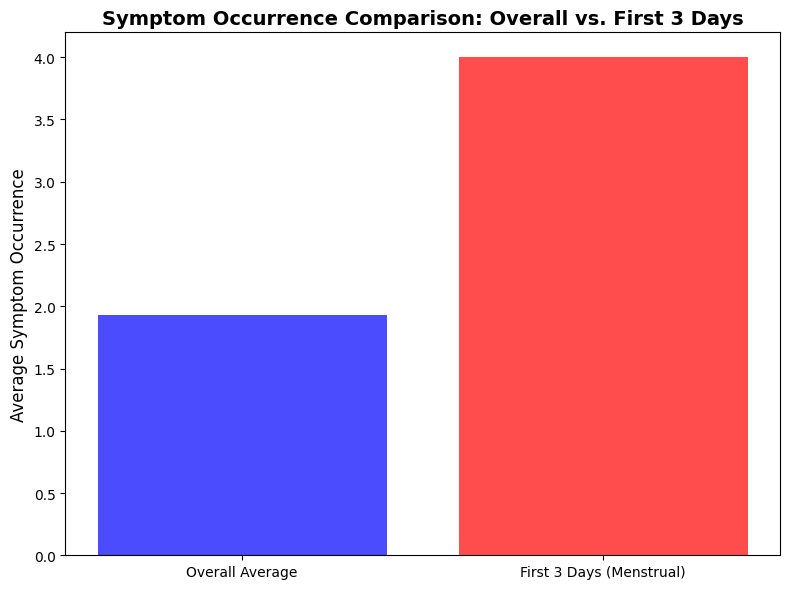

In [1]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from datetime import timedelta

# Define menstrual cycle start dates
menstrual_cycles = {
    "2024-09-27": None,
    "2024-10-28": None,
    "2024-11-23": None,
}

# Standardize menstrual cycle dates
menstrual_cycles = {pd.to_datetime(date).date(): duration for date, duration in menstrual_cycles.items()}

# Symptom types
symptom_types = {
    "HKCategoryTypeIdentifierAbdominalCramps",
    "HKCategoryTypeIdentifierBloating",
    "HKCategoryTypeIdentifierHeadache",
    "HKCategoryTypeIdentifierAcne",
    "HKCategoryTypeIdentifierLowerBackPain",
    "HKCategoryTypeIdentifierPelvicPain",
    "HKCategoryTypeIdentifierMoodChanges",
    "HKCategoryTypeIdentifierDiarrhea",
    "HKCategoryTypeIdentifierFatigue",
    "HKCategoryTypeIdentifierNausea",
    "HKCategoryTypeIdentifierAppetiteChanges",
    "HKCategoryTypeIdentifierHotFlashes",
    "HKCategoryTypeIdentifierNightSweats",
    "HKCategoryTypeIdentifierChills",
    "HKCategoryTypeIdentifierHairLoss",
    "HKCategoryTypeIdentifierDrySkin",
    "HKCategoryTypeIdentifierBladderIncontinence",
    "HKCategoryTypeIdentifierMemoryLapse",
}

# Function to process XML data and extract symptom occurrences
def process_symptom_data(xml_file_path):
    try:
        tree = ET.parse(xml_file_path)
        root = tree.getroot()
        
        data = []
        
        for record in root.findall("Record"):
            record_type = record.get("type")
            if record_type in symptom_types:
                start_date = record.get("startDate").split(" ")[0]  # Extract start date
                data.append({"date": pd.to_datetime(start_date).date(), "symptom_type": record_type})

        return pd.DataFrame(data)
    
    except ET.ParseError as e:
        print(f"XML parsing error: {e}")
        return pd.DataFrame()
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return pd.DataFrame()

# Function to calculate overall and first 3-day averages
def calculate_averages(symptom_data, menstrual_cycles):
    overall_count = symptom_data.shape[0]
    total_days = len(symptom_data["date"].unique())
    overall_avg = overall_count / total_days  # Overall average

    menstrual_day_counts = []

    for cycle_start in menstrual_cycles.keys():
        cycle_start_date = pd.to_datetime(cycle_start).date()
        menstrual_range = [cycle_start_date + timedelta(days=i) for i in range(3)]  # First 3 days
        menstrual_day_counts.append(
            symptom_data[symptom_data["date"].isin(menstrual_range)].shape[0]
        )

    avg_menstrual = sum(menstrual_day_counts) / len(menstrual_day_counts)

    return overall_avg, avg_menstrual

# Function to visualize the averages
def visualize_averages(overall_avg, avg_menstrual):
    categories = ["Overall Average", "First 3 Days (Menstrual)"]
    averages = [overall_avg, avg_menstrual]

    plt.figure(figsize=(8, 6))
    plt.bar(categories, averages, color=["blue", "red"], alpha=0.7)
    plt.title("Symptom Occurrence Comparison: Overall vs. First 3 Days", fontsize=14, fontweight="bold")
    plt.ylabel("Average Symptom Occurrence", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

# Path to your XML file
xml_file_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"  # Replace with your actual file path

# Check file existence
if not os.path.exists(xml_file_path):
    print(f"Error: File does not exist at path: {xml_file_path}")
else:
    # Process symptom data
    symptom_data = process_symptom_data(xml_file_path)

    if not symptom_data.empty:
        # Calculate averages
        overall_avg, avg_menstrual = calculate_averages(symptom_data, menstrual_cycles)

        # Visualize the averages
        visualize_averages(overall_avg, avg_menstrual)
    else:
        print("No symptom data available for analysis.")


In [4]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
from datetime import timedelta
from scipy.stats import ttest_ind

# Define menstrual cycle start dates
menstrual_cycles = {
    "2024-09-27": None,
    "2024-10-28": None,
    "2024-11-23": None,
}

# Standardize menstrual cycle dates
menstrual_cycles = {pd.to_datetime(date).date(): duration for date, duration in menstrual_cycles.items()}

# Symptom types
symptom_types = {
    "HKCategoryTypeIdentifierAbdominalCramps",
    "HKCategoryTypeIdentifierBloating",
    "HKCategoryTypeIdentifierHeadache",
    "HKCategoryTypeIdentifierAcne",
    "HKCategoryTypeIdentifierLowerBackPain",
    "HKCategoryTypeIdentifierPelvicPain",
    "HKCategoryTypeIdentifierMoodChanges",
    "HKCategoryTypeIdentifierDiarrhea",
    "HKCategoryTypeIdentifierFatigue",
    "HKCategoryTypeIdentifierNausea",
    "HKCategoryTypeIdentifierAppetiteChanges",
    "HKCategoryTypeIdentifierHotFlashes",
    "HKCategoryTypeIdentifierNightSweats",
    "HKCategoryTypeIdentifierChills",
    "HKCategoryTypeIdentifierHairLoss",
    "HKCategoryTypeIdentifierDrySkin",
    "HKCategoryTypeIdentifierBladderIncontinence",
    "HKCategoryTypeIdentifierMemoryLapse",
}

# Function to process XML data and extract symptom occurrences
def process_symptom_data(xml_file_path):
    try:
        tree = ET.parse(xml_file_path)
        root = tree.getroot()
        
        data = []
        
        for record in root.findall("Record"):
            record_type = record.get("type")
            if record_type in symptom_types:
                start_date = record.get("startDate").split(" ")[0]  # Extract start date
                data.append({"date": pd.to_datetime(start_date).date(), "symptom_type": record_type})

        return pd.DataFrame(data)
    
    except ET.ParseError as e:
        print(f"XML parsing error: {e}")
        return pd.DataFrame()
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return pd.DataFrame()

# Function to split data into first 3 days and other days
def split_data(symptom_data, menstrual_cycles):
    first_3_days_counts = []
    other_days_counts = []

    for cycle_start in menstrual_cycles.keys():
        cycle_start_date = pd.to_datetime(cycle_start).date()  # Ensure proper date conversion
        first_3_days = [cycle_start_date + timedelta(days=i) for i in range(3)]

        # Count symptoms for first 3 days
        first_3_days_count = symptom_data[symptom_data["date"].isin(first_3_days)].shape[0]
        first_3_days_counts.append(first_3_days_count)

        # Count symptoms for other days (excluding first 3 days of the cycle)
        other_days_count = symptom_data[~symptom_data["date"].isin(first_3_days)].shape[0]
        other_days_counts.append(other_days_count)

    return first_3_days_counts, other_days_counts

# Function to perform t-test
def perform_ttest(first_3_days_counts, other_days_counts):
    t_stat, p_value = ttest_ind(first_3_days_counts, other_days_counts, equal_var=False)

    print("Hypothesis Testing:")
    print("Null Hypothesis: The average symptom occurrences during the first 3 days of menstrual flow are the same as on other days.")
    print("Alternative Hypothesis: The average symptom occurrences during the first 3 days of menstrual flow are significantly higher than on other days.")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print("Result: Reject the null hypothesis. Symptom occurrences are significantly higher during the first 3 days of menstrual flow.")
    else:
        print("Result: Fail to reject the null hypothesis. No significant difference in symptom occurrences.")

# Path to your XML file
xml_file_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"  # Replace with your actual file path

# Check file existence
if not os.path.exists(xml_file_path):
    print(f"Error: File does not exist at path: {xml_file_path}")
else:
    # Process symptom data
    symptom_data = process_symptom_data(xml_file_path)

    if not symptom_data.empty:
        # Split data into first 3 days and other days
        first_3_days_counts, other_days_counts = split_data(symptom_data, menstrual_cycles)

        # Perform t-test
        perform_ttest(first_3_days_counts, other_days_counts)
    else:
        print("No symptom data available for analysis.")


Hypothesis Testing:
Null Hypothesis: The average symptom occurrences during the first 3 days of menstrual flow are the same as on other days.
Alternative Hypothesis: The average symptom occurrences during the first 3 days of menstrual flow are significantly higher than on other days.
T-statistic: -31.11269837220809
P-value: 6.359389614001519e-06
Result: Reject the null hypothesis. Symptom occurrences are significantly higher during the first 3 days of menstrual flow.
